# **Projet RAKUTEN**
* **Source des données :** https://www.kaggle.com/datasets/moussasacko/rakuten-france-multimodal-product-classification?resource=download
  * ## Fonctions globales de support pour l'analyse

In [1]:
# all imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go


def get_df_missed_unique_values(df):
    if isinstance(df, pd.DataFrame):
        ret = {}
        for col in df.columns:
            n = df[col].isna().sum()
            n1 = df[col].unique()
            ret[col] = {
                    'manquantes': n,
                    'manquantes (%)': 100*n/df.shape[0],
                    'uniques': n1,
                    'unique (nombre)': len(n1),
                    'uniques (%)': 100*len(n1)/df.shape[0]
                    }
            
        return ret
    return {}


def get_df_basic_elements(df, infos_types= ['shape', 'head', 'tail', 'info', 'describe'], actions= ['return', 'print']):
    ret = { 'shape': '', 'head': '', 'tail': '',  'info': '', 'describe': '' }
    if isinstance(df, pd.DataFrame):
        if 'shape' in infos_types:
            df_shape = df.shape
            if 'print' in  actions: 
                print("shape------------------------------------------------------")
                print(df_shape)
            if 'return' in actions:
                ret['shape'] = str(df_shape)
        if 'head' in infos_types:
            df_head = df.head()
            if 'print' in  actions: 
                print("head------------------------------------------------------")
                display(df_head)
            if 'return' in actions:
                ret['head'] = str(df_head)
        if 'tail' in infos_types:
            df_tail = df.tail()
            if 'print' in  actions: 
                print("tail------------------------------------------------------")
                display(df_tail)
            if 'return' in actions:
                ret['tail'] = str(df_tail)
        if 'info' in infos_types:
            df_info = df.info()
            if 'print' in  actions: 
                print("info------------------------------------------------------")
                display(df_info)
            if 'return' in actions:
                ret['info'] = str(df_info)
        if 'describe' in infos_types:
            df_describe = df.describe()
            if 'print' in  actions: 
                print("describe------------------------------------------------------")
                display(df_describe)
            if 'return' in actions:
                ret['describe'] = str(df_describe)
        
        if 'return' in actions:
            return {'data': ret}
    return {'data': ret}              
                

## **A. Premières analyses**

### **STEPS 1 :** Lecture les 2 datasets sources X_train_update.csv et X_test_update.csv

In [13]:

# step 1 : Fusionner les 2 datasets sources X_train_update.csv et X_test_update.csv 
print("STEP 1----------------------------------------------------------------------")
df1 = pd.read_csv('../data/X_train_update.csv', index_col = 0)
df2 = pd.read_csv('../data/X_test_update.csv', index_col = 0)

print("\n=====INFOS GLOBALES=====\n")

print("\n\t\t=====df1=", "../data/X_train_update.csv", "infos" )
get_df_basic_elements(df1, ['shape', 'head', 'tail', 'info'], ['print'])
print("\n\t\t////////////////////////////////////////////////////////////////////////////////////////////////////////////")
print("\n\t\t=====df2=", "../data/X_test_update.csv", "infos" )
get_df_basic_elements(df2, ['shape', 'head', 'tail', 'info'], 'print')


print("\n=====VALEURS MANQUANTES & UNIQUES=====\n")
print("\n\t\t=====df1=", 'X_train_update.csv' )
ret1 = get_df_missed_unique_values(df1)
display(pd.DataFrame(ret1))
print("\n\t\t>////////////////////////////////////////////////////////////////////////////////////////////////////////////")
print("\n\t\t=====df2=", '../data/X_test_update.csv' )
ret2 = get_df_missed_unique_values(df2)
display(pd.DataFrame(ret2))


STEP 1----------------------------------------------------------------------

=====INFOS GLOBALES=====


		=====df1= ../data/X_train_update.csv infos
shape------------------------------------------------------
(84900, 4)
head------------------------------------------------------


,designation,description,productid,imageid
id,,,,
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


tail------------------------------------------------------


,designation,description,productid,imageid
id,,,,
84911,The Sims [ Import Anglais ],NaN,206719094,941495734
84912,Kit piscine acier NEVADA déco pierre Ø 3.50m x...,<b>Description complète :</b><br />Kit piscine...,3065095706,1188462883
84913,Journal Officiel De La Republique Francaise N°...,NaN,440707564,1009325617
84914,Table Basse Bois De Récupération Massif Base B...,<p>Cette table basse a un design unique et con...,3942400296,1267353403
84915,Gomme De Collection 2 Gommes Pinguin Glace Ver...,NaN,57203227,684671297


<class 'pandas.core.frame.DataFrame'>
Index: 84900 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84900 non-null  object
 1   description  55106 non-null  object
 2   productid    84900 non-null  int64 
 3   imageid      84900 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB
info------------------------------------------------------


None


		////////////////////////////////////////////////////////////////////////////////////////////////////////////

		=====df2= ../data/X_test_update.csv infos
shape------------------------------------------------------
(13812, 4)
head------------------------------------------------------


,designation,description,productid,imageid
id,,,,
84916,Folkmanis Puppets - 2732 - Marionnette Et Théâ...,NaN,516376098,1019294171
84917,Porte Flamme Gaxix - Flamebringer Gaxix - 136/...,NaN,133389013,1274228667
84918,Pompe de filtration Speck Badu 95,NaN,4128438366,1295960357
84919,Robot de piscine électrique,<p>Ce robot de piscine d&#39;un design innovan...,3929899732,1265224052
84920,Hsm Destructeur Securio C16 Coupe Crois¿E: 4 X...,NaN,152993898,940543690


tail------------------------------------------------------


,designation,description,productid,imageid
id,,,,
98723,Robe De Soutien De Sac De Soins De Les Suspend...,Robe Porte-soins Sac Protecteur vêtements Hang...,3959381879,1269508019
98724,Livre De Phrases - Français ? Thaïlandais,NaN,1546314127,1308816290
98725,Tifon1 200 M de Espa - Pompe piscine,Tension (V) : Monophasé - 230 V Puissance : 2...,2887191300,1169904062
98726,Christmas Home Non Slip Door Floor Mats Hall R...,Christmas Home Non Slip Door Floor Mats Hall R...,4061586053,1283583872
98727,Suspension Cascade 6 Lumières Verra Noire Et C...,Contemporaine et élégante la suspension VERRA ...,4042554330,1280010121


<class 'pandas.core.frame.DataFrame'>
Index: 13812 entries, 84916 to 98727
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  13812 non-null  object
 1   description  8926 non-null   object
 2   productid    13812 non-null  int64 
 3   imageid      13812 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 539.5+ KB
info------------------------------------------------------


None


=====VALEURS MANQUANTES & UNIQUES=====


		=====df1= X_train_update.csv


,designation,description,productid,imageid
manquantes,0,29794,0,0
manquantes (%),0.0,35.093051,0.0,0.0
uniques,[Olivia: Personalisiertes Notizbuch / 150 Seit...,"[nan, PILOT STYLE Touch Pen de marque Speedlin...","[3804725264, 436067568, 201115110, 50418756, 2...","[1263597046, 1008141237, 938777978, 457047496,..."
unique (nombre),82250,47500,84900,84900
uniques (%),96.878681,55.948174,100.0,100.0



		>////////////////////////////////////////////////////////////////////////////////////////////////////////////

		=====df2= ../data/X_test_update.csv


,designation,description,productid,imageid
manquantes,0,4886,0,0
manquantes (%),0.0,35.375036,0.0,0.0
uniques,[Folkmanis Puppets - 2732 - Marionnette Et Thé...,"[nan, <p>Ce robot de piscine d&#39;un design i...","[516376098, 133389013, 4128438366, 3929899732,...","[1019294171, 1274228667, 1295960357, 126522405..."
unique (nombre),13681,8347,13812,13812
uniques (%),99.051549,60.432957,100.0,100.0


### **STEPS 2 :** concatiner les 2 datasets dans un DataFrame df

Le dataset de test n'ayant pas les données cibles disponibles, il ne sera pas intégré dans le dataset de base. Autrement dit, il est écarté.

## **STEPS 3 :** Analyse et merge de 'Y_train_CVw08PX.csv' avec df1 (X_train_update.csv)

    * (a) Analyse de '**Y_train_CVw08PX.csv**' désigné en tant que Y_train
    * (b) Est-ce que tous les **productid** dans l'ensemble Y_train sont bien référencés dans df1 ?

In [14]:
print("(a)")
# analyse de Y_train_CVw08PX.csv 
df_y_train = pd.read_csv('../data/Y_train_CVw08PX.csv', sep=',', index_col=0)
print("df_y_train infos, valeurs manquantes et uniques :\n//////////////////////////////////////////////////////")
get_df_basic_elements(df_y_train, ['shape', 'head', 'tail', 'info'], ['return', 'print'])
print("Missing values in 'Y_train_CVw08PX.csv' :")
display(pd.DataFrame(get_df_missed_unique_values(df_y_train)))


print("(b)")
df_Y_train_productid_found = pd.merge(df1, df_y_train, on='id', how='left')
print("Nombre d'articles dans df1 (X_train_update.csv) ayant un 'prdtypecode' non vide dans Y_train=", df_Y_train_productid_found.shape[0])
df_Y_train_productid_found_1 = pd.merge(df1, df_y_train, on='id', how='right')
print("Nombre d'articles dans Y_train ayant un 'prdtypecode' non vide dans df1 (X_train_update.csv) =", df_Y_train_productid_found_1.shape[0])

print("df_Y_train_productid_found.shape[0] == df1.shape[0] ?", df_Y_train_productid_found.shape[0] == df1.shape[0])
print("df_Y_train_productid_found.shape[0] > df1.shape[0] ?", df_Y_train_productid_found.shape[0]> df1.shape[0])
print("df_Y_train_productid_found.shape[0] < df1.shape[0] ?", df_Y_train_productid_found.shape[0]< df1.shape[0])

print("df_Y_train_productid_found.shape[0] == df1.shape[0] ?", df_Y_train_productid_found_1.shape[0] == df1.shape[0])
print("df_Y_train_productid_found.shape[0] > df1.shape[0] ?", df_Y_train_productid_found_1.shape[0]> df1.shape[0])
print("df_Y_train_productid_found.shape[0] < df1.shape[0] ?", df_Y_train_productid_found_1.shape[0]< df1.shape[0])

# display( pd.DataFrame(get_df_basic_elements(df_Y_train_productid_found, ['shape', 'head', 'tail', 'info'], ['return'])) )


(a)
df_y_train infos, valeurs manquantes et uniques :
//////////////////////////////////////////////////////
shape------------------------------------------------------
(84916, 1)
head------------------------------------------------------


,prdtypecode
id,
0,10
1,2280
2,50
3,1280
4,2705


tail------------------------------------------------------


,prdtypecode
id,
84911,40
84912,2583
84913,2280
84914,1560
84915,2522


<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   prdtypecode  84916 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB
info------------------------------------------------------


None

Missing values in 'Y_train_CVw08PX.csv' :


,prdtypecode
manquantes,0
manquantes (%),0.0
unique (nombre),27
uniques,"[10, 2280, 50, 1280, 2705, 2522, 2582, 1560, 1..."
uniques (%),0.031796


(b)
Nombre d'articles dans df1 (X_train_update.csv) ayant un 'prdtypecode' non vide dans Y_train= 84900
Nombre d'articles dans Y_train ayant un 'prdtypecode' non vide dans df1 (X_train_update.csv) = 84916
df_Y_train_productid_found.shape[0] == df1.shape[0] ? True
df_Y_train_productid_found.shape[0] > df1.shape[0] ? False
df_Y_train_productid_found.shape[0] < df1.shape[0] ? False
df_Y_train_productid_found.shape[0] == df1.shape[0] ? False
df_Y_train_productid_found.shape[0] > df1.shape[0] ? True
df_Y_train_productid_found.shape[0] < df1.shape[0] ? False


## **Step 4 :** merge Y_train_CVw08PX.csv with df1 (X_train_update.csv) based on the index id

In [15]:

# Step 3 : merge Y_train_CVw08PX.csv with df (based on the index id)
# if index is absent for df2 entries set column 'prdtypecode' as 0 (product type code is unknown)
print("Merge de df_y_train (Y_train_CVw08PX.csv) avec l'ensemble du dataset rakuten.csv \n/////////////////////////////////////////////////////////")
# do outer merge to include all even those articles without category (set to 0 if not known)
all_content = pd.merge(df1, df_y_train, on='id', how='right')
# ajouter 2 colonnes calculant les longeurs de 'designation' et 'description'
all_content['designation_length'] = all_content['designation'].apply(lambda x: len(str(x)))
all_content['description_length'] = all_content['description'].apply(lambda x: len(str(x)))
# Obtenir les infos du nouveau Dataframe
get_df_basic_elements(all_content, ['shape', 'head', 'tail', 'info'], ['return', 'print'])

print("lignes sans 'prdtypecode' :")
print(all_content[(all_content['prdtypecode'] == np.nan) | (all_content['prdtypecode'] == 0)])
print(all_content[(all_content['prdtypecode'] == np.nan) | (all_content['prdtypecode'] == 0)].sum())

"""
print("Remplacement de 'prdtypecode' absent par 0 :\n//////////////////////////////////////////////////////////////////////////////////////////////")
# obtenir les lignes sans 'prdtypecode'
print("Lignes de all_content sans 'prdtypecode' :", len( all_content[all_content['prdtypecode'].isna()] ) )
# remplacer les enytrées 'prdtypecode' manquantes par 0 pour indiquer l'absence de product type code
all_content['prdtypecode'] = all_content['prdtypecode'].fillna(0)
# test again
print("Lignes de all_content sans 'prdtypecode' après remplacement des entrées manquantes par 0:", len( all_content[all_content['prdtypecode'].isna()] ) )
get_df_basic_elements(all_content, ['head', 'tail'], ['return', 'print'])
"""

# changer le type 'prdtypecode' à int64
print("changer les types de  'productid', 'imageid' et 'prdtypecode' à int64 : \n//////////////////////////////////////////////////////////////////////////////////////////////")
all_content['productid'] = all_content['productid'].astype('Int64')
all_content['imageid'] = all_content['imageid'].astype('Int64')
all_content['prdtypecode'] = all_content['prdtypecode'].astype('Int64')
print("info après changement du type de 'prdtypecode' ------------------------------------------------------")
get_df_basic_elements(all_content, ['info'], ['return', 'print'])
display(pd.DataFrame (get_df_missed_unique_values(all_content)))

Merge de df_y_train (Y_train_CVw08PX.csv) avec l'ensemble du dataset rakuten.csv 
/////////////////////////////////////////////////////////
shape------------------------------------------------------
(84916, 7)
head------------------------------------------------------


,designation,description,productid,imageid,prdtypecode,designation_length,description_length
id,,,,,,,
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3.804725e+09,1.263597e+09,10,88,3
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,4.360676e+08,1.008141e+09,2280,206,3
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,2.011151e+08,9.387780e+08,50,76,760
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,5.041876e+07,4.570475e+08,1280,63,3
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,2.785359e+08,1.077758e+09,2705,20,213


tail------------------------------------------------------


,designation,description,productid,imageid,prdtypecode,designation_length,description_length
id,,,,,,,
84911,The Sims [ Import Anglais ],NaN,2.067191e+08,9.414957e+08,40,27,3
84912,Kit piscine acier NEVADA déco pierre Ø 3.50m x...,<b>Description complète :</b><br />Kit piscine...,3.065096e+09,1.188463e+09,2583,52,1206
84913,Journal Officiel De La Republique Francaise N°...,NaN,4.407076e+08,1.009326e+09,2280,241,3
84914,Table Basse Bois De Récupération Massif Base B...,<p>Cette table basse a un design unique et con...,3.942400e+09,1.267353e+09,1560,63,1616
84915,Gomme De Collection 2 Gommes Pinguin Glace Ver...,NaN,5.720323e+07,6.846713e+08,2522,54,3


<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   designation         84900 non-null  object 
 1   description         55106 non-null  object 
 2   productid           84900 non-null  float64
 3   imageid             84900 non-null  float64
 4   prdtypecode         84916 non-null  int64  
 5   designation_length  84916 non-null  int64  
 6   description_length  84916 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 5.2+ MB
info------------------------------------------------------


None

lignes sans 'prdtypecode' :
Empty DataFrame
Columns: [designation, description, productid, imageid, prdtypecode, designation_length, description_length]
Index: []
designation             0
description             0
productid             0.0
imageid               0.0
prdtypecode             0
designation_length      0
description_length      0
dtype: object
changer les types de  'productid', 'imageid' et 'prdtypecode' à int64 : 
//////////////////////////////////////////////////////////////////////////////////////////////
info après changement du type de 'prdtypecode' ------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   designation         84900 non-null  object
 1   description         55106 non-null  object
 2   productid           84900 non-null  Int64 
 3   imageid             849

None

,designation,description,productid,imageid,prdtypecode,designation_length,description_length
manquantes,16,29810,16,16,0,0,0
manquantes (%),0.018842,35.105281,0.018842,0.018842,0.0,0.0,0.0
uniques,[Olivia: Personalisiertes Notizbuch / 150 Seit...,"[nan, PILOT STYLE Touch Pen de marque Speedlin...","[3804725264, 436067568, 201115110, 50418756, 2...","[1263597046, 1008141237, 938777978, 457047496,...","[10, 2280, 50, 1280, 2705, 2522, 2582, 1560, 1...","[88, 206, 76, 63, 20, 65, 42, 82, 41, 83, 39, ...","[3, 760, 213, 121, 2375, 629, 3889, 977, 581, ..."
unique (nombre),82251,47500,84901,84901,27,240,3717
uniques (%),96.861604,55.937632,99.982335,99.982335,0.031796,0.282632,4.377267


### **STEPS 5 :** Ecrire la DataFrame résultat de la fusion dans notre dataset source **rakuten.csv**

In [6]:
# step 4 : et les écrire dans un fichier rakuten.csv avec index, car la 1ère colonne des 2 datasets représente l'index
print("\nSTEP 3 écriture dans le csv 'rakuten.csv'-----------------")
all_content.to_csv('rakuten.csv', index=True)


STEP 3 écriture dans le csv 'rakuten.csv'-----------------


### **STEP 6 :** Lecture de rakuten.csv dans un DataFrame et premières analyses des variables du résultat de la concaténation

In [16]:
# step 4 : redéfinir df à partir du nouveau dataset rakuten.csv

df_rakuten = pd.read_csv("../data/rakuten.csv", sep=',', index_col=0)
print("Résumé des données du DF df_rakuten.shape", df_rakuten.shape, "-------------------------------------")
get_df_basic_elements(df_rakuten, ['shape', 'head', 'tail', 'info'], ['return', 'print'])

print("changer les types de  'productid', 'imageid' et 'prdtypecode' à int64 : \n")
df_rakuten['productid'] = df_rakuten['productid'].astype('Int64')
df_rakuten['imageid'] = df_rakuten['imageid'].astype('Int64')
print("info après changement du type de 'prdtypecode' ------------------------------------------------------")
get_df_basic_elements(df_rakuten, ['info'], ['return', 'print'])



print("\nRAKUTEN Nan-----------------------------------------------------")
display(df_rakuten.isna())
print(df_rakuten.isna().value_counts())


print("\nValeurs manquantes/uniques dans chaque colonne de df (rakuten.csv) :-----------------------------------------------------")
ret = get_df_missed_unique_values(df_rakuten)
display(pd.DataFrame(ret))



Résumé des données du DF df_rakuten.shape (84916, 7) -------------------------------------
shape------------------------------------------------------
(84916, 7)
head------------------------------------------------------


,designation,description,productid,imageid,prdtypecode,designation_length,description_length
id,,,,,,,
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3.804725e+09,1.263597e+09,10,88,3
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,4.360676e+08,1.008141e+09,2280,206,3
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,2.011151e+08,9.387780e+08,50,76,760
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,5.041876e+07,4.570475e+08,1280,63,3
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,2.785359e+08,1.077758e+09,2705,20,213


tail------------------------------------------------------


,designation,description,productid,imageid,prdtypecode,designation_length,description_length
id,,,,,,,
84911,The Sims [ Import Anglais ],NaN,2.067191e+08,9.414957e+08,40,27,3
84912,Kit piscine acier NEVADA déco pierre Ø 3.50m x...,<b>Description complète :</b><br />Kit piscine...,3.065096e+09,1.188463e+09,2583,52,1206
84913,Journal Officiel De La Republique Francaise N°...,NaN,4.407076e+08,1.009326e+09,2280,241,3
84914,Table Basse Bois De Récupération Massif Base B...,<p>Cette table basse a un design unique et con...,3.942400e+09,1.267353e+09,1560,63,1616
84915,Gomme De Collection 2 Gommes Pinguin Glace Ver...,NaN,5.720323e+07,6.846713e+08,2522,54,3


<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   designation         84900 non-null  object 
 1   description         55106 non-null  object 
 2   productid           84900 non-null  float64
 3   imageid             84900 non-null  float64
 4   prdtypecode         84916 non-null  int64  
 5   designation_length  84916 non-null  int64  
 6   description_length  84916 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 5.2+ MB
info------------------------------------------------------


None

changer les types de  'productid', 'imageid' et 'prdtypecode' à int64 : 

info après changement du type de 'prdtypecode' ------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   designation         84900 non-null  object
 1   description         55106 non-null  object
 2   productid           84900 non-null  Int64 
 3   imageid             84900 non-null  Int64 
 4   prdtypecode         84916 non-null  int64 
 5   designation_length  84916 non-null  int64 
 6   description_length  84916 non-null  int64 
dtypes: Int64(2), int64(3), object(2)
memory usage: 5.3+ MB
info------------------------------------------------------


None


RAKUTEN Nan-----------------------------------------------------


,designation,description,productid,imageid,prdtypecode,designation_length,description_length
id,,,,,,,
0,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
84911,False,True,False,False,False,False,False
84912,False,False,False,False,False,False,False
84913,False,True,False,False,False,False,False


designation  description  productid  imageid  prdtypecode  designation_length  description_length
False        False        False      False    False        False               False                 55106
             True         False      False    False        False               False                 29794
True         True         True       True     False        False               False                    16
Name: count, dtype: int64

Valeurs manquantes/uniques dans chaque colonne de df (rakuten.csv) :-----------------------------------------------------


,designation,description,productid,imageid,prdtypecode,designation_length,description_length
manquantes,16,29810,16,16,0,0,0
manquantes (%),0.018842,35.105281,0.018842,0.018842,0.0,0.0,0.0
uniques,[Olivia: Personalisiertes Notizbuch / 150 Seit...,"[nan, PILOT STYLE Touch Pen de marque Speedlin...","[3804725264, 436067568, 201115110, 50418756, 2...","[1263597046, 1008141237, 938777978, 457047496,...","[10, 2280, 50, 1280, 2705, 2522, 2582, 1560, 1...","[88, 206, 76, 63, 20, 65, 42, 82, 41, 83, 39, ...","[3, 760, 213, 121, 2375, 629, 3889, 977, 581, ..."
unique (nombre),82251,47500,84901,84901,27,240,3717
uniques (%),96.861604,55.937632,99.982335,99.982335,0.031796,0.282632,4.377267


,count_desc_na,count_desc_nonna_unique,count_desc_nonna_dup
prdtypecode,,,
10,2778,332,6
40,1642,584,282
50,477,1077,127
60,133,653,46
1140,1726,826,119
1160,3604,342,7
1180,611,137,16
1280,1069,3694,107
1281,492,1535,43


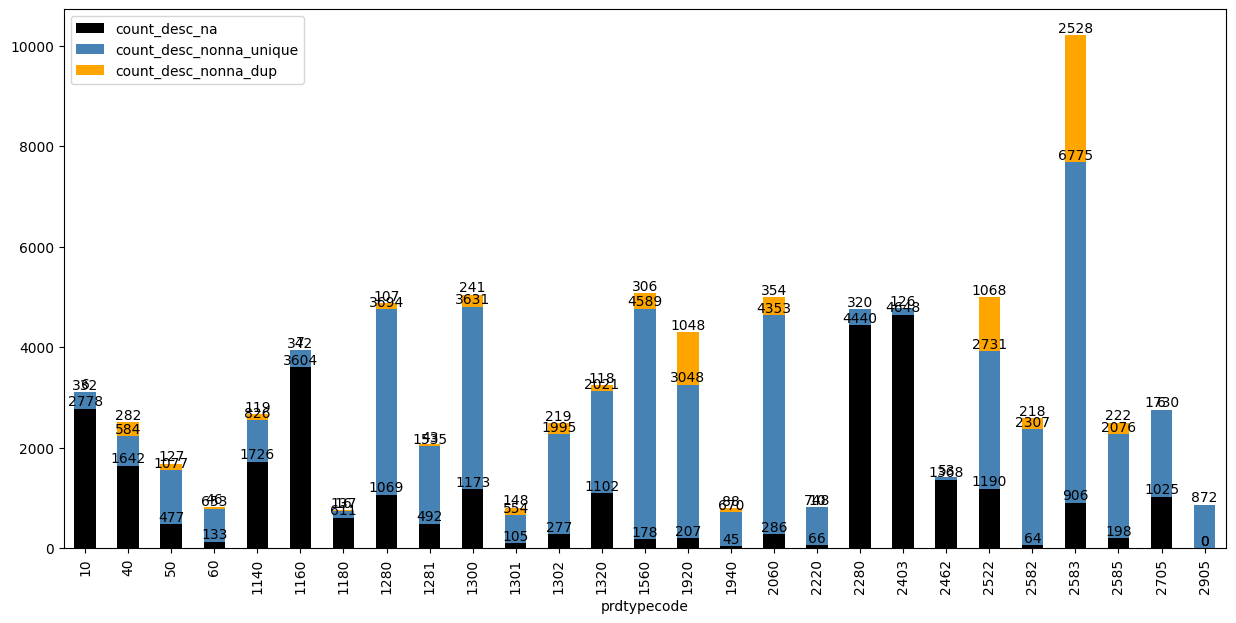

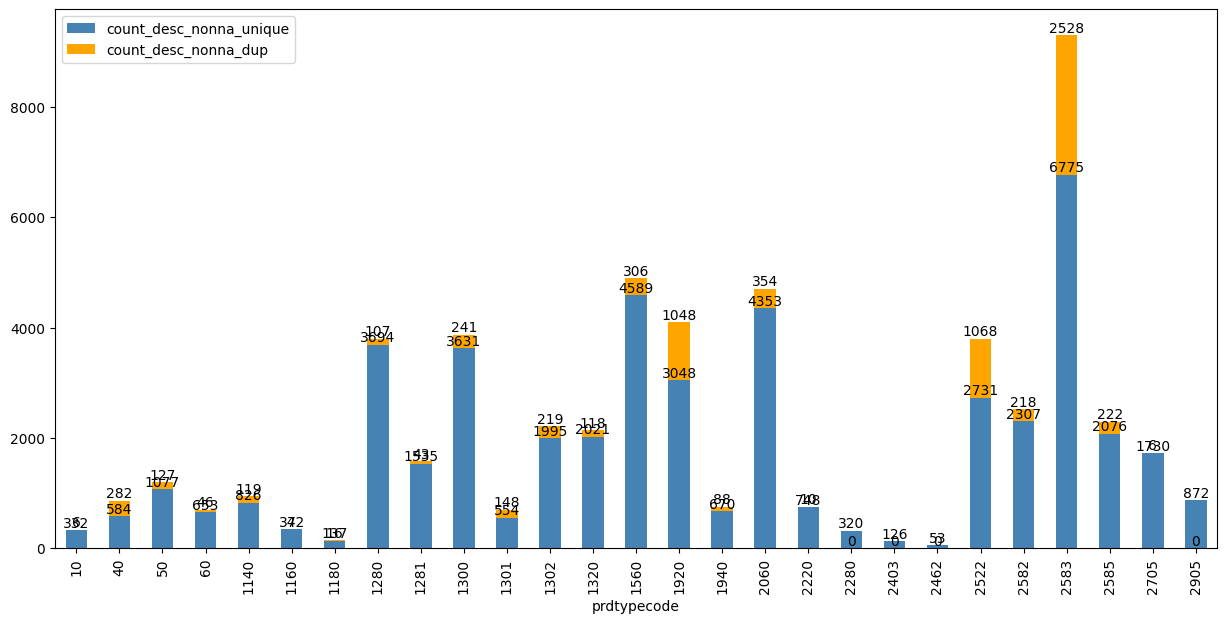

In [17]:
# repris du travail de Ouissam GOUNI (https://github.com/ouissamgouni/bootcamp-mle24-rakuten/tree/main)

data_byprdtype_na=df_rakuten.groupby('prdtypecode', group_keys=True).agg(
    count_desc_na=('description',lambda x: x.isna().sum()), 
    count_desc_nonna_unique=('description',lambda x: (x[x.notna()].unique()).size), 
    count_desc_nonna_dup=('description',lambda x: x[x.notna()].duplicated().sum()))

display(data_byprdtype_na)

ax1=data_byprdtype_na.plot.bar(stacked=True, color=['black', 'steelblue', 'orange'], figsize=(15, 7))
ax1.bar_label(ax1.containers[0], labels=data_byprdtype_na['count_desc_na'])
ax1.bar_label(ax1.containers[1], labels=data_byprdtype_na['count_desc_nonna_unique'])
ax1.bar_label(ax1.containers[2], labels=data_byprdtype_na['count_desc_nonna_dup'])

plt.show();

data_byprdtype_na_1=df_rakuten.groupby('prdtypecode', group_keys=True).agg(
    count_desc_nonna_unique=('description',lambda x: (x[x.notna()].unique()).size), 
    count_desc_nonna_dup=('description',lambda x: x[x.notna()].duplicated().sum()))

ax2=data_byprdtype_na_1.plot.bar(stacked=True, color=['steelblue', 'orange'], figsize=(15, 7))
ax2.bar_label(ax2.containers[0], labels=data_byprdtype_na_1['count_desc_nonna_unique'])
ax2.bar_label(ax2.containers[1], labels=data_byprdtype_na_1['count_desc_nonna_dup'])

plt.show();

In [18]:
n_na = df_rakuten[df_rakuten['prdtypecode'] == np.nan]
print("n_na=", len(n_na))
#temp = df_rakuten.drop(df_rakuten.iloc[:, df_rakuten['prdtypecode'].isna()], axis=0)
#display(temp)

#print("\n=========================\nNombre d'articles avec 'prdtypecode' = 0 ou absent:\n=========================\n",  
#      pd.DataFrame (df_rakuten[(df_rakuten['prdtypecode'] == 0) | (df_rakuten['prdtypecode'] == np.nan) | (df_rakuten['prdtypecode'] == '')]) )


n_na= 0


### **STEP 7 :** premières analyses du set Y contenant la variable cible (**Y_train_CVw08PX.csv**)

In [19]:
df_y = pd.read_csv('../data/Y_train_CVw08PX.csv', sep=',', index_col=0)
ret = get_df_basic_elements(df_y, ['shape', 'head', 'tail', 'info'], ['return', 'print'])
# display(pd.DataFrame(ret))
print("/////////////////////////////////////////////////////////////////////////////")
display( pd.DataFrame (get_df_missed_unique_values(df_y)) )


shape------------------------------------------------------
(84916, 1)
head------------------------------------------------------


,prdtypecode
id,
0,10
1,2280
2,50
3,1280
4,2705


tail------------------------------------------------------


,prdtypecode
id,
84911,40
84912,2583
84913,2280
84914,1560
84915,2522


<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   prdtypecode  84916 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB
info------------------------------------------------------


None

/////////////////////////////////////////////////////////////////////////////


,prdtypecode
manquantes,0
manquantes (%),0.0
unique (nombre),27
uniques,"[10, 2280, 50, 1280, 2705, 2522, 2582, 1560, 1..."
uniques (%),0.031796


### **Words cloud** de 'designation' et 'description'

C:\Users\abdel\AppData\Local\Temp\ipykernel_21456\1919475384.py:16: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



(-0.5, 1199.5, 799.5, -0.5)

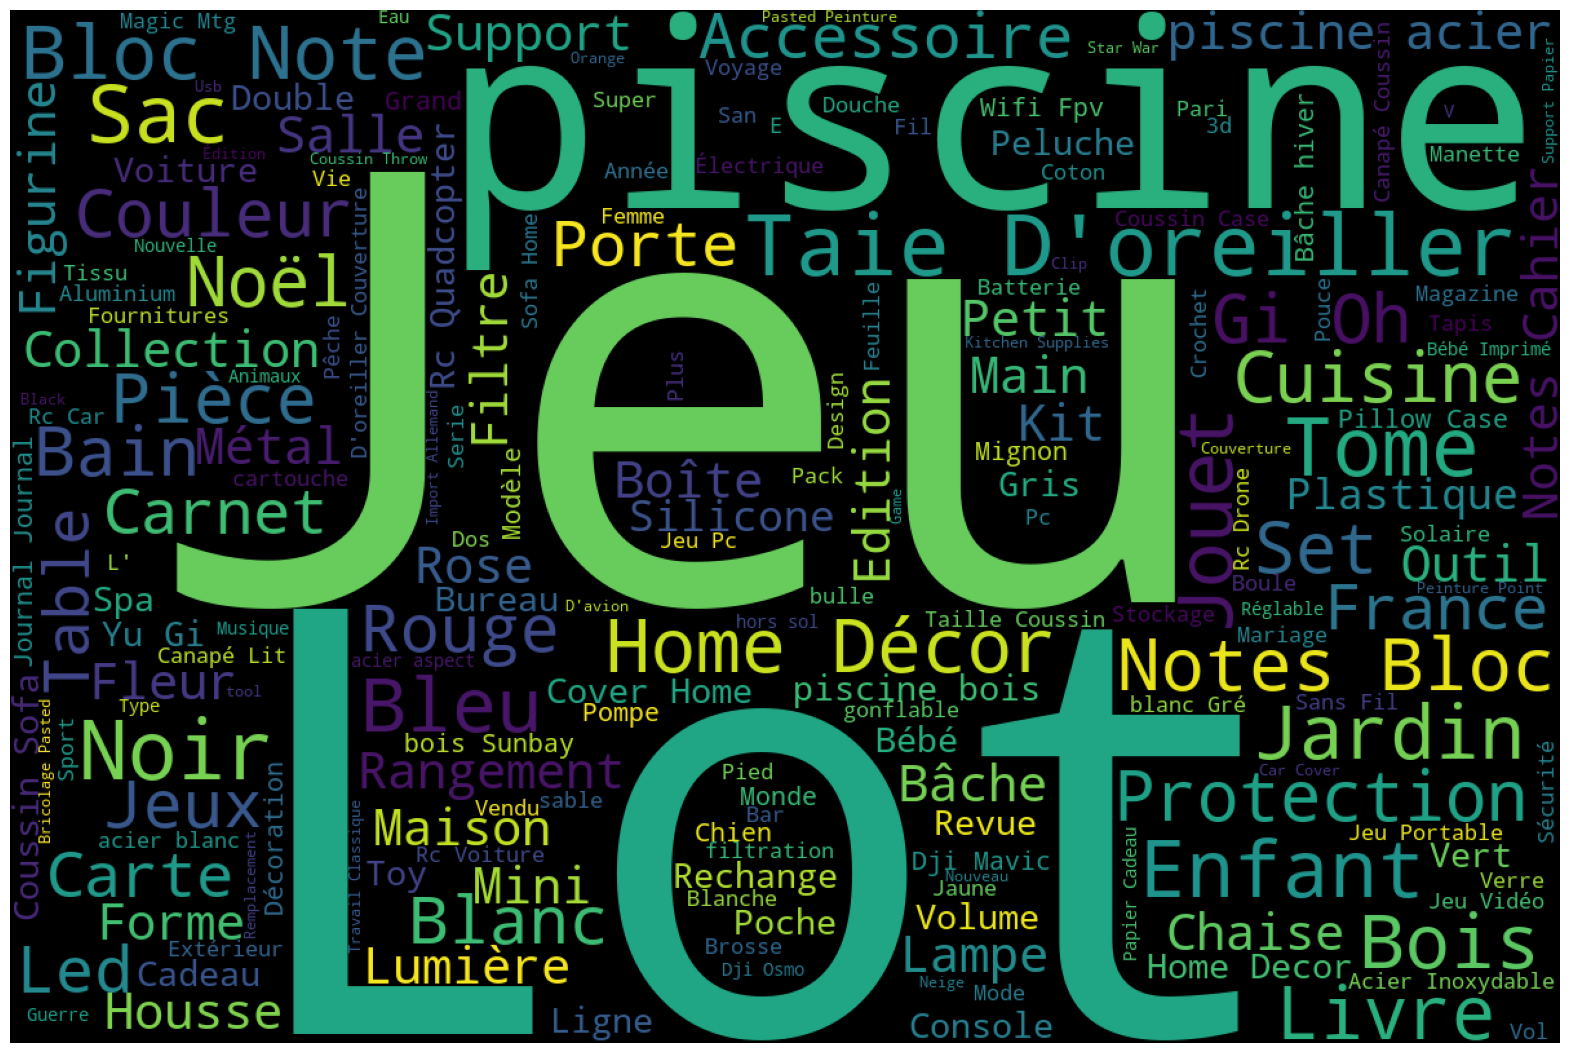

In [39]:
from wordcloud import WordCloud, STOPWORDS
#import nltk
# nltk.download()
from nltk.corpus import stopwords

# wc = WordCloud(width=1200, height=800)
my_stopwords = set(STOPWORDS).union(['le', 'la', 'les', 'un', 'deux', 'trois', 'quatre', 'cinq', 'une', 'et', 'de', 'du', 'des', 'ceci', 'cela', 'plusieurs', 'seul', 'seule', 'avec', 'pour', 
                                     'ce', 'ceci', 'cela', 'ceux', 'celles', 'ne', 'non', 'par', 'pour', 'parce', 'que', 'qui', 'comment', 'comme', 'ou', 'où', 'tout', 'toute', 'peut',
                                     'être', 'li', 'ul', 'br', 'b', 'br', 'x', 'p', 'div', 'h1', 'h2','h3','h4', 'td', 'tr', 'nbsp', 'amp', 'cm', 'm', 'mm', 'm3', 'h', 'l', 'strong', 'ca',
                                     'ainsi', 'cas', 'g', 'kg']).union(stopwords.words('french'))
wc = WordCloud(width=1200, height=800, stopwords= my_stopwords)
# make merge of all designation column content
all_designation_df = df_rakuten.iloc[:, 0:1].fillna('').apply(lambda x: "".join(x.astype(str)), axis=0)
#display("all_designation_df=", all_designation_df[0])

wc.generate(all_designation_df[0])
plt.figure(figsize=(20, 20))
plt.imshow(wc)
plt.axis('off')

**On note :**
>- Les **mots clés** se rapporte au type de l'article et non à ses fonctionnalités et carctéristiques en conformité avec la colonne qui porte le jeu de mots, à quelques exceptions comme les **couleurs**, la **matière** etc.
>- Les 3 mots dominants **"Jeu", "Lot" et "piscine"** révèlent les types d'articles majoritaire dans le dataset que l'on peut quantifier. En particulier, le mot **Lot** est plutôt commmun indiquant un ensemble du même article, est finalement sans trop d'importance.

C:\Users\abdel\AppData\Local\Temp\ipykernel_21456\446768478.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



(-0.5, 1199.5, 799.5, -0.5)

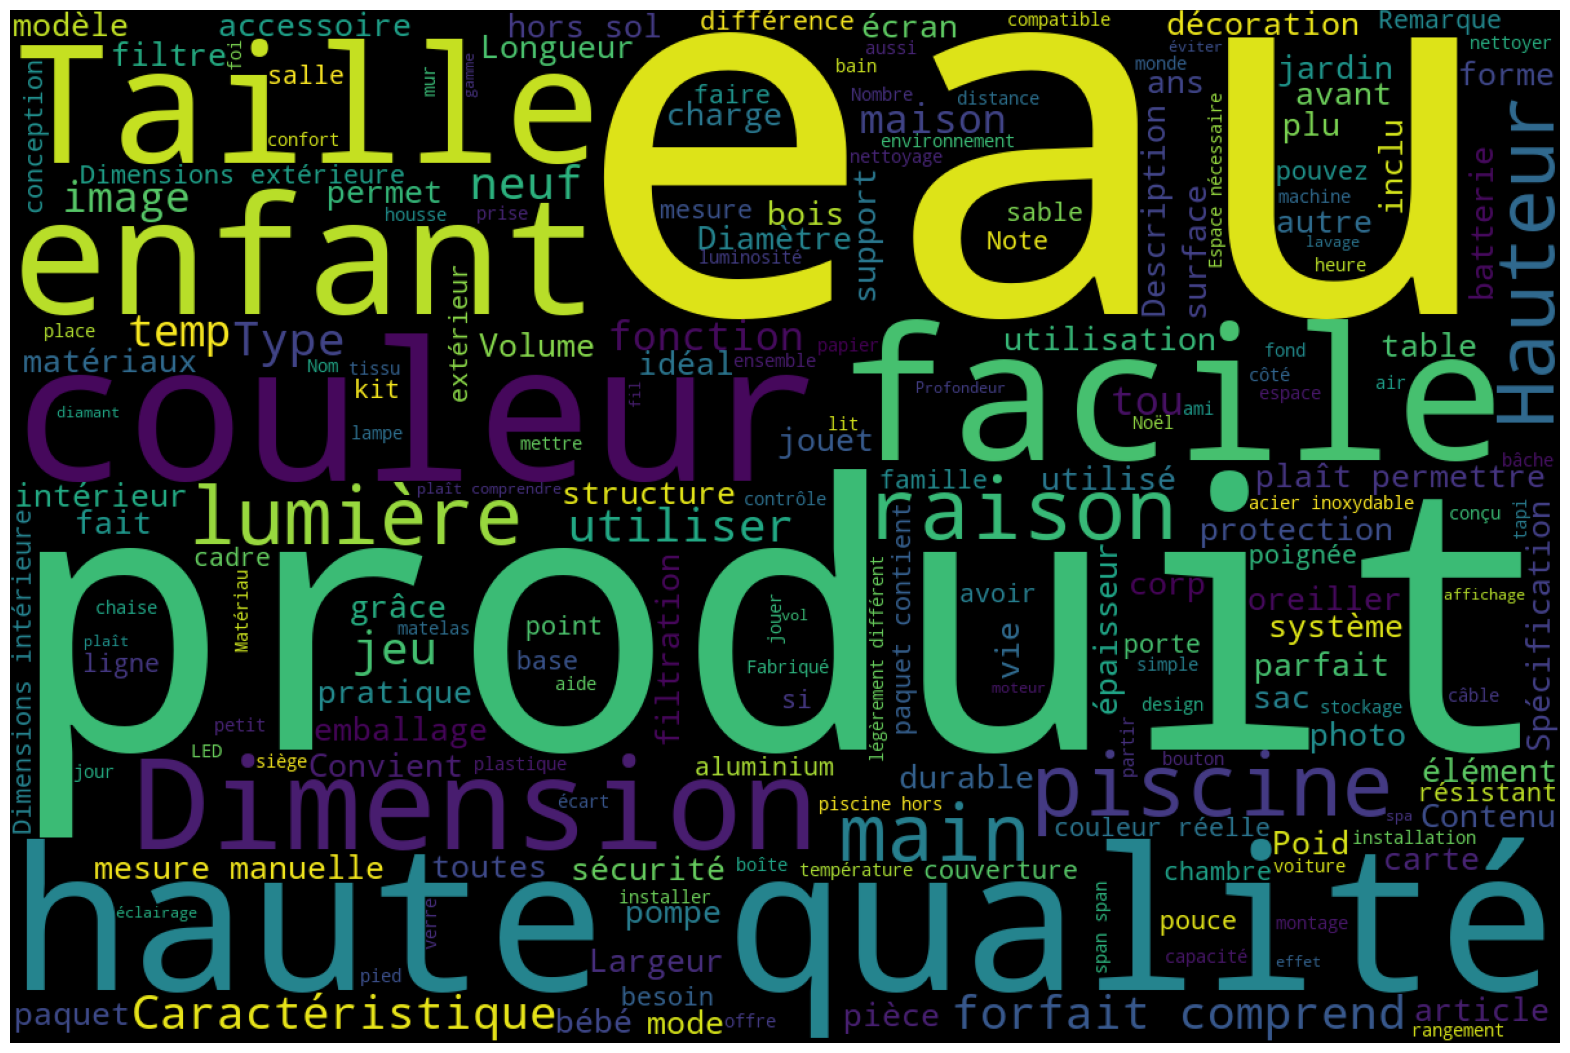

In [38]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

# add some stop word
# enlever en plus toutes les balises HTML...
my_stopwords = set(STOPWORDS).union(['le', 'la', 'les', 'un', 'deux', 'trois', 'quatre', 'cinq', 'une', 'et', 'de', 'du', 'des', 'ceci', 'cela', 'plusieurs', 'seul', 'seule', 'avec', 'pour', 
                                     'ce', 'ceci', 'cela', 'ceux', 'celles', 'ne', 'non', 'par', 'pour', 'parce', 'que', 'qui', 'comment', 'comme', 'ou', 'où', 'tout', 'toute', 'peut',
                                     'être', 'li', 'ul', 'br', 'b', 'br', 'x', 'p', 'div', 'h1', 'h2','h3','h4', 'td', 'tr', 'nbsp', 'amp', 'cm', 'm', 'mm', 'm3', 'h', 'l', 'strong', 'ca',
                                     'ainsi', 'cas', 'g', 'kg']).union(stopwords.words('french'))
wc = WordCloud(width=1200, height=800, stopwords= my_stopwords)

# make merge of all designation column content
all_description_df = df_rakuten.iloc[:, 1:2].fillna('').apply(lambda x: "".join(x.astype(str)), axis=0)
#display("all_designation_df=", all_designation_df[0])

wc.generate(all_description_df[0])
plt.figure(figsize=(20, 20))
plt.imshow(wc)
plt.axis('off')

**On note :**
>- Les mots dominants porte plutôt sur le **descriptif**, les **caractéristiqus** et **fonctionnalités** des produits, comme les **dimensions**, les **couleurs**, **à qui s'adresse ?**, l'**usage** etc.
>- Le mot **produit** est plutôt générique que l'on peut exclure
>- Le mot **eau** est particulier, car il peut se rapporter à plusieurs articles à la fois, comme les piscines, les outils qui utilisent ou traitent l'eau comme matière etc. 

### **STEP 8  :** Visualisation des données

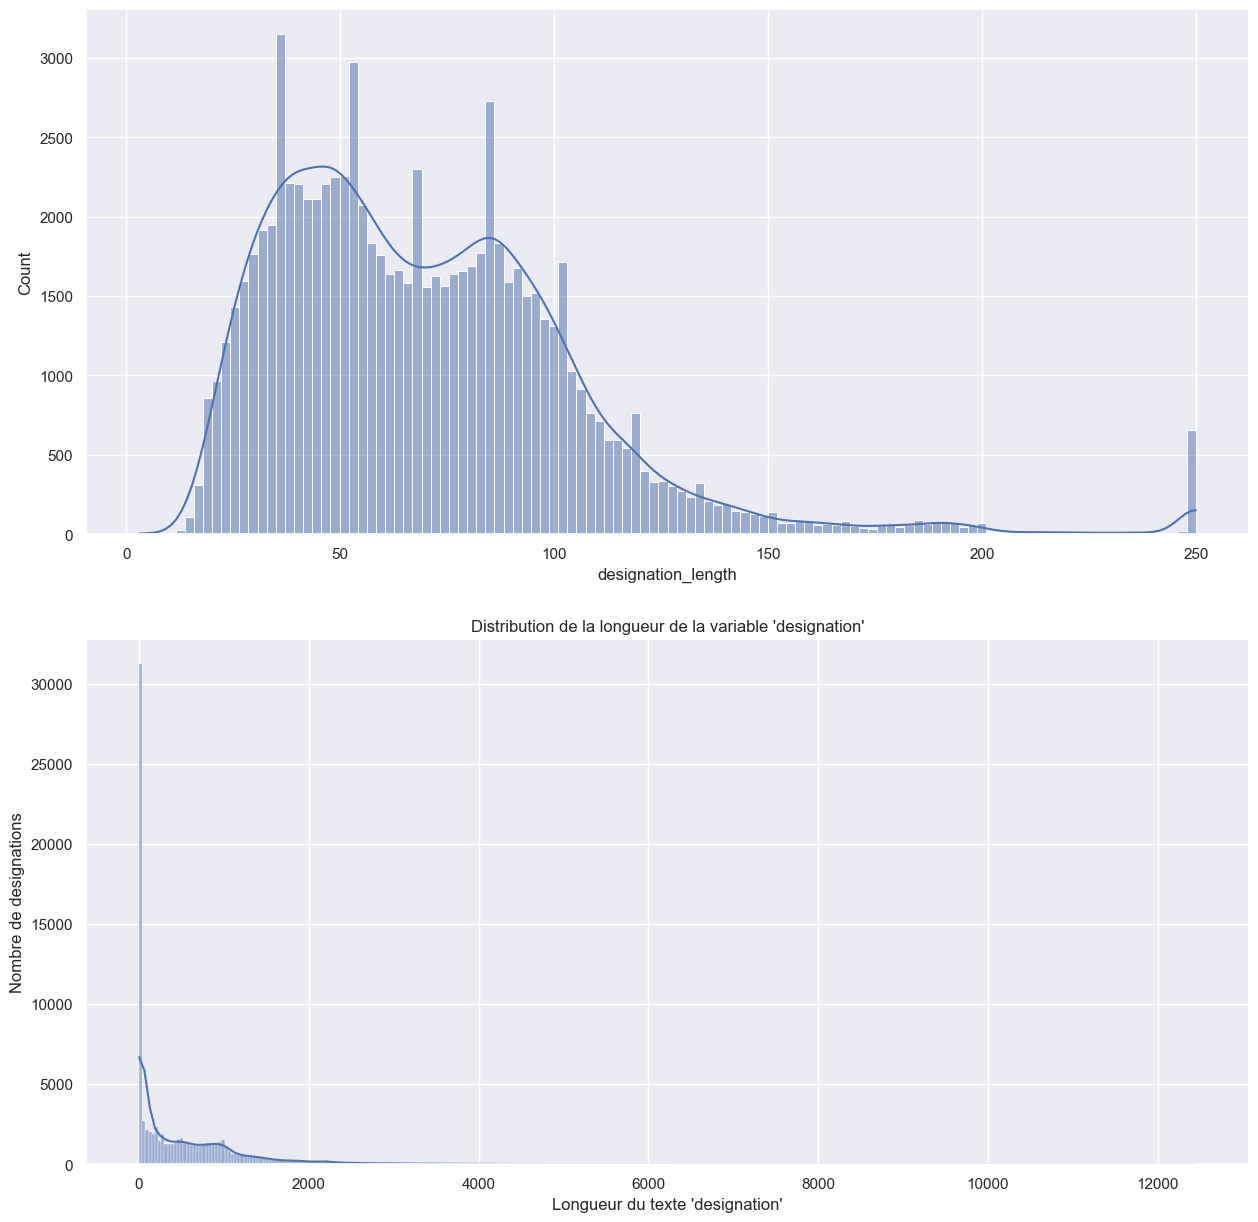

In [50]:
%matplotlib inline 

sns.set_theme(rc={'figure.figsize': (15, 15)})
fig, ax = plt.subplots(nrows= 2, ncols= 1)
g1 = sns.histplot(df_rakuten['designation_length'], ax=ax[0], kde=True)
g2 = sns.histplot(df_rakuten['description_length'], ax=ax[1], kde= True)

plt.xlabel("Longueur du texte 'designation'")
plt.ylabel('Nombre de designations')
plt.title("Distribution de la longueur de la variable 'designation'")
plt.grid(True)
plt.show()           


In [25]:
# compute Q0, Q1, Q2, Q3 and Q4 for 'description' and 'designation' lengths with respect to 'prdtypecode'
repart_prdtypecode = df_rakuten.groupby(['designation_length', 'description_length', 'prdtypecode']).agg( prdtypecode_count=('prdtypecode', lambda x:x.count() ))
display(repart_prdtypecode)


prdtypecode_count
designation_length description_length prdtypecode                   
3                  3                  10                           1
                                      50                           1
                                      1160                         2
                                      1280                         1
                                      1300                         1
...                                                              ...
247                3                  2280                        13
248                3                  2280                        14
249                3                  10                           2
                                      2280                        38
250                3                  2280                       603

[51223 rows x 1 columns]

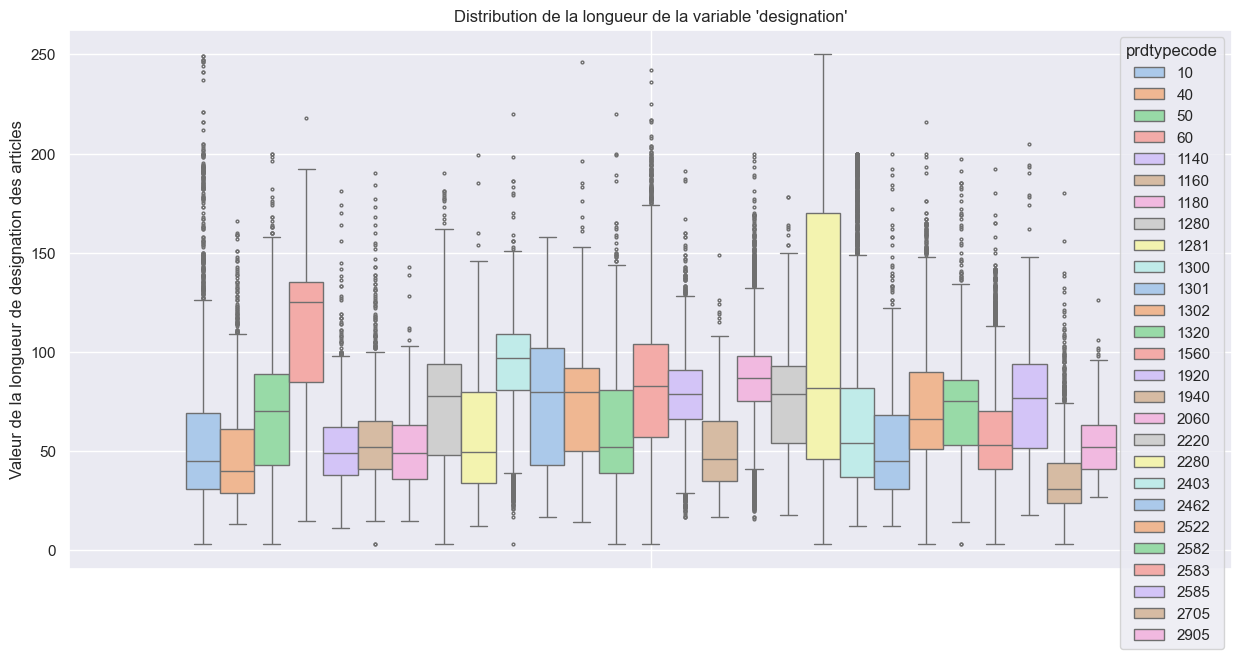

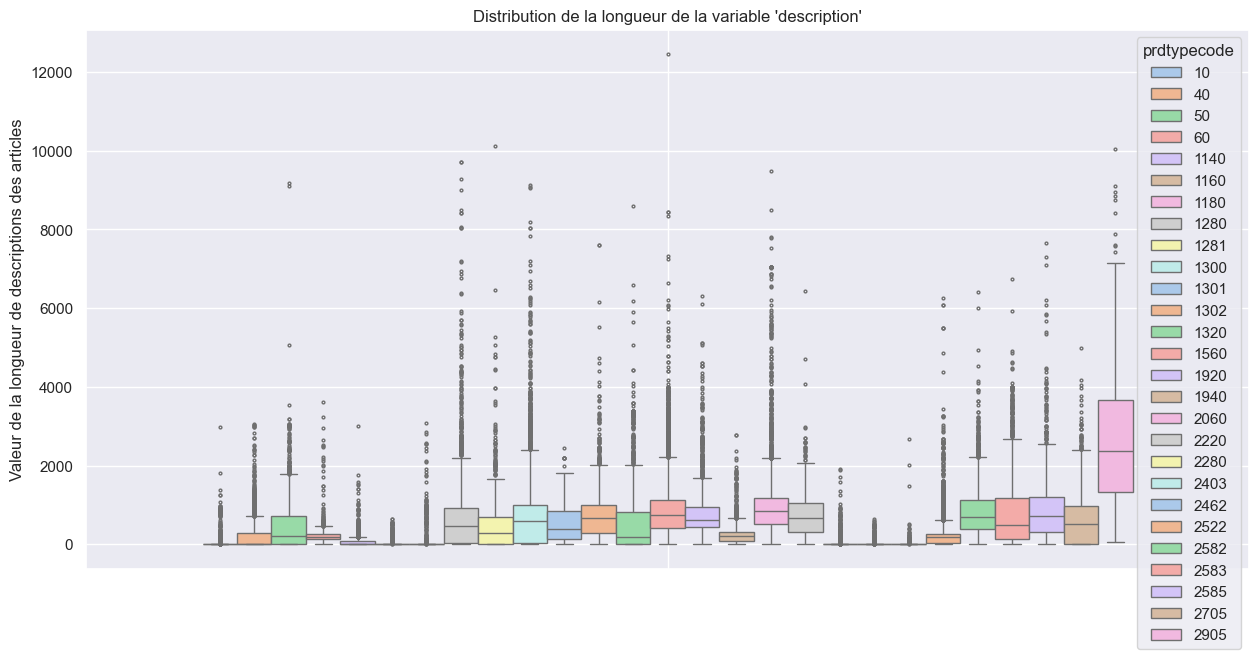

In [26]:

sns.set_theme(rc={'figure.figsize': (15, 7)})
fig, ax = plt.subplots(nrows= 1, ncols= 1)
g1 = sns.boxplot(data=df_rakuten,  y= 'designation_length', ax=ax, hue='prdtypecode', gap=2, fliersize=2, palette='pastel')
plt.ylabel('Valeur de la longueur de designation des articles')
plt.title("Distribution de la longueur de la variable 'designation'")
plt.grid(True)
plt.show()  


fig, ax = plt.subplots(nrows= 1, ncols= 1)
g2 = sns.boxplot(data=df_rakuten,  y= 'description_length', ax=ax, hue='prdtypecode', gap=2, fliersize=2, palette='pastel')
plt.ylabel('Valeur de la longueur de descriptions des articles')
plt.title("Distribution de la longueur de la variable 'description'")
plt.grid(True)
plt.show()           


>- **description**: beaucoup d'outliers supérieurs à Q3, la majorté ne dépasse pas les 1000 de longeur (à l'zxceptio de la cat n° 2905, jeux videos/PC)
>- **designation**: la catégorie coddée **1281** semble être la seule qui ne possède pas d'outliers ni inliers; il suffit d'examiner à quel type d'articles est associée (catégorie descriptive) ?

*Il faut aller plus loin et examiner les mots que ces deux colonnes contiennent, faire une analyse sémantique, statistique et voir si une corrélation existe entre ces deux champs ?*

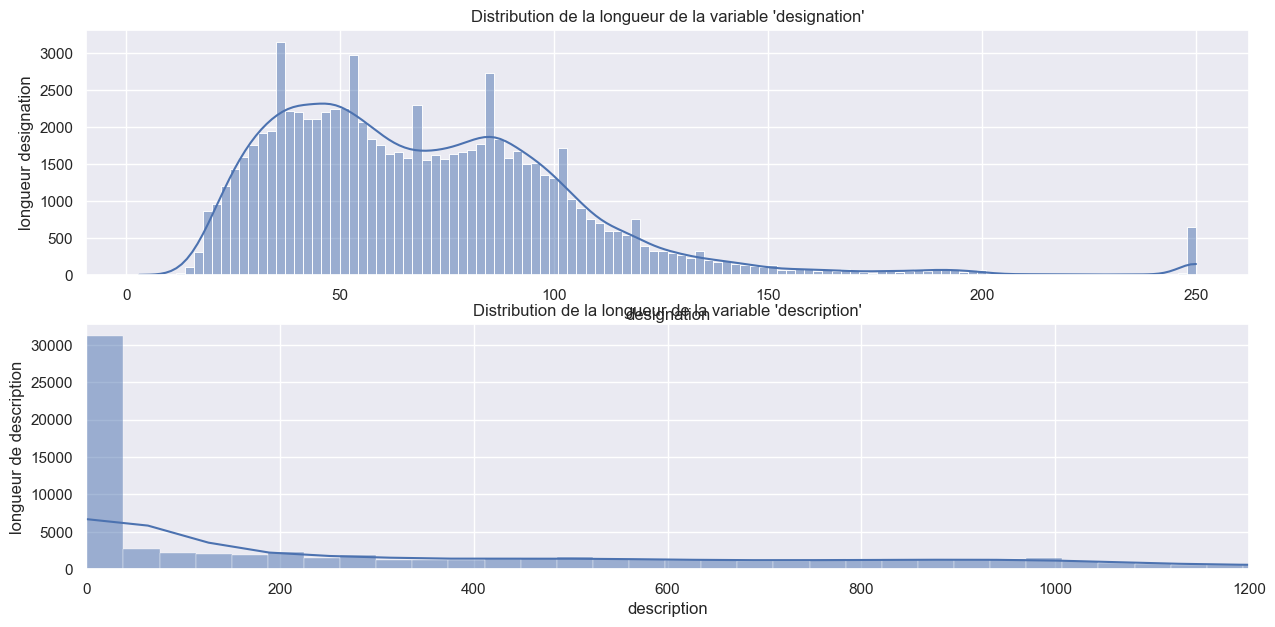

In [42]:
#sns.set_theme(rc={'figure.figsize': (10, 15)})
fig, ax = plt.subplots(nrows= 2, ncols= 1)
g1 = sns.histplot(df_rakuten['designation_length'], ax=ax[0], kde=True)
g2 = sns.histplot(df_rakuten['description_length'], ax=ax[1], kde=True)
g1.set(xlabel= "designation", ylabel='longueur designation', 
       title="Distribution de la longueur de la variable 'designation'")
g2.set(xlabel= "description", ylabel='longueur de description', 
       title="Distribution de la longueur de la variable 'description'", xlim=[0, 1200])

plt.grid(True)
plt.show()    

>- Une concentration de la distibution de la longeur de la variable **'designation'** est située entre 20 et 200 mots avec 2 pic autour de 30 et 80; une analyse des Qi peut être réalisée
>- Pour le champ représentant la longeur de la variable **'description'** est plutôt centrée au voisignage de 35 (trop importante) puis elle diminue jusqu'à 0 (lignes sans description du produit) 

In [28]:
# Use PLOTLY instead, more useful for interaction and dynamics
designation_df = df_rakuten[['designation', 'designation_length']]
designation_df['design_count'] = designation_df['designation_length'].value_counts()



"""
fig = go.Figure()
fig.add_trace(go.Bar(x = designation_df['designation_length'], 
                    y = designation_df['design_count'], 
                    text= designation_df['designation']))
fig.update_layout(title="Distribution du nombre des valeurs uniques de la variable 'designation'",
                  xaxis_title="Longueur du texte 'designation'",  yaxis_title="Distribution du nombre de la variable 'designation'" )
#fig.update_xaxes(range=[0, 1000])
#fig.update_yaxes(range=[0, 1000])  
fig.show()


fig = go.Figure()
fig.add_trace(go.Bar(x = df_rakuten['designation_length'], 
                    y = df_rakuten['designation_length'].value_counts(), 
                    text= df_rakuten['designation']))
fig.update_layout(title="Distribution de la longueur de la variable 'designation'",
                  xaxis_title="Longueur du texte 'designation'",  yaxis_title="Distribution de la longueur de la variable 'designation'" )
fig.show()
"""


C:\Users\abdel\AppData\Local\Temp\ipykernel_21456\133130527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  designation_df['design_count'] = designation_df['designation_length'].value_counts()


'\nfig = go.Figure()\nfig.add_trace(go.Bar(x = designation_df[\'designation_length\'], \n                    y = designation_df[\'design_count\'], \n                    text= designation_df[\'designation\']))\nfig.update_layout(title="Distribution du nombre des valeurs uniques de la variable \'designation\'",\n                  xaxis_title="Longueur du texte \'designation\'",  yaxis_title="Distribution du nombre de la variable \'designation\'" )\n#fig.update_xaxes(range=[0, 1000])\n#fig.update_yaxes(range=[0, 1000])  \nfig.show()\n\n\nfig = go.Figure()\nfig.add_trace(go.Bar(x = df_rakuten[\'designation_length\'], \n                    y = df_rakuten[\'designation_length\'].value_counts(), \n                    text= df_rakuten[\'designation\']))\nfig.update_layout(title="Distribution de la longueur de la variable \'designation\'",\n                  xaxis_title="Longueur du texte \'designation\'",  yaxis_title="Distribution de la longueur de la variable \'designation\'" )\nfig.show()\n

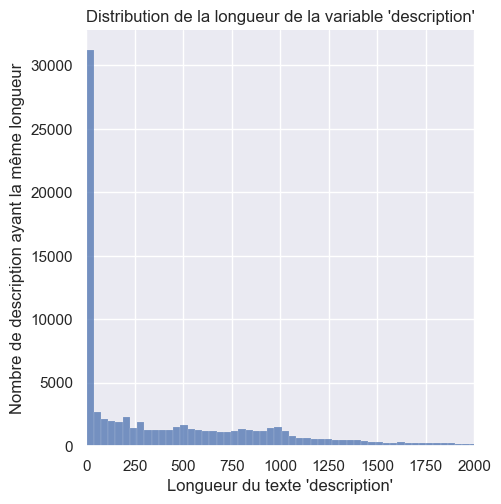

'\n# Use PLOTLY instead, more useful for interaction and dynamics\nfig = go.Figure()\nfig.add_trace(go.Bar(x = df_rakuten[\'description_length\'], \n                         y = df_rakuten[\'description_length\'].value_counts(), \n                        text= df_rakuten[\'designation\']))\nfig.update_layout(title="Distribution de la longueur de la variable \'description\'",\n                  xaxis_title="Longueur du texte \'description\'",  yaxis_title="Nombre de description de la même longueur" )\nfig.update_xaxes(range=[0, 1000])\nfig.update_yaxes(range=[0, 1000])  \nfig.show()\n'

In [29]:
g2 = sns.displot(df_rakuten['description_length'])
plt.xlim(0, 2000)
plt.xlabel("Longueur du texte 'description'")
plt.ylabel('Nombre de description ayant la même longueur')
plt.title("Distribution de la longueur de la variable 'description'")
plt.grid(True)
plt.show()        

# already done with seaborn less heavy


"""
# Use PLOTLY instead, more useful for interaction and dynamics
fig = go.Figure()
fig.add_trace(go.Bar(x = df_rakuten['description_length'], 
                         y = df_rakuten['description_length'].value_counts(), 
                        text= df_rakuten['designation']))
fig.update_layout(title="Distribution de la longueur de la variable 'description'",
                  xaxis_title="Longueur du texte 'description'",  yaxis_title="Nombre de description de la même longueur" )
fig.update_xaxes(range=[0, 1000])
fig.update_yaxes(range=[0, 1000])  
fig.show()
"""


In [30]:
# Histogram of descriptions (length >0 or =0)

"""
fig = go.Figure()
fig.add_trace(go.Histogram(x=df_rakuten['description_length'], text= df_rakuten['description']))
fig.update_layout(title="Histogramme de la longueur de la variable 'description'",
                  xaxis_title="Longueur du texte 'description'",  yaxis_title="Longueur de description" )
fig.update_xaxes(range=[0, 1000])
#fig.update_yaxes(range=[0, 1000])  
fig.show()
"""

'\nfig = go.Figure()\nfig.add_trace(go.Histogram(x=df_rakuten[\'description_length\'], text= df_rakuten[\'description\']))\nfig.update_layout(title="Histogramme de la longueur de la variable \'description\'",\n                  xaxis_title="Longueur du texte \'description\'",  yaxis_title="Longueur de description" )\nfig.update_xaxes(range=[0, 1000])\n#fig.update_yaxes(range=[0, 1000])  \nfig.show()\n'

Répartition des articles par code catégorie :
----------------------------------------------


,designation
prdtypecode,
10,3115
40,2508
50,1680
60,832
1140,2671
1160,3951
1180,764
1280,4869
1281,2070


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


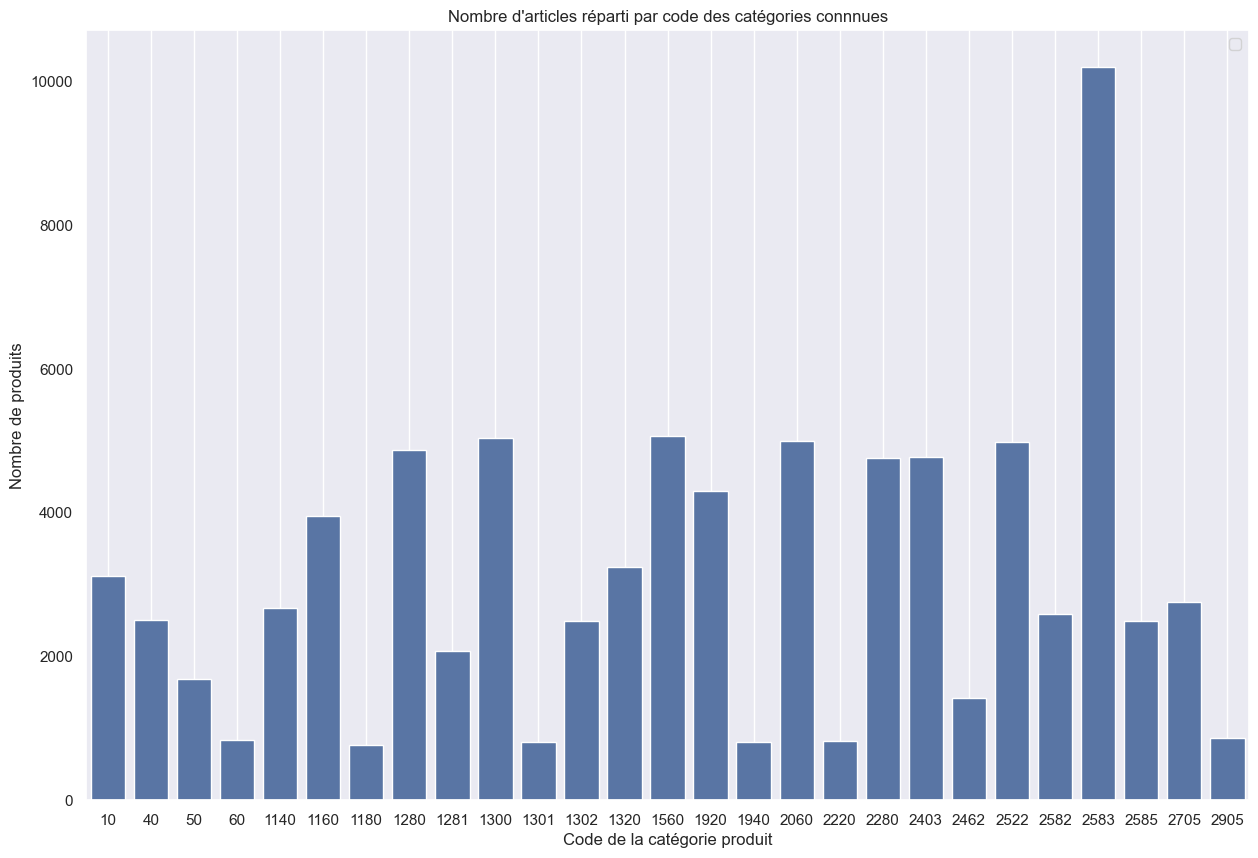

In [31]:
# Examinons la répartion par catégorie en fonction de prdtypecode (27 connus)
# valeurs possible : 10 40 50 60 1140 1160 1180 1280 1281 1300 1301 1302 1320 1560 1920 1940 2060 2220 2280 2403 2462 2522 2582 2583 2585 2705 2905 
unique_prdtypecode = df_rakuten['prdtypecode'].unique()
#display(unique_prdtypecode)
#display(df_rakuten.columns)
#articles_per_prdtypecode = df_rakuten.groupby(by=['prdtypecode', 'designation']).agg({'designation', 'count'})

articles_per_prdtypecode = df_rakuten[df_rakuten['prdtypecode'] > 0].loc[:, ['prdtypecode','designation']].groupby(by=['prdtypecode']).count()
print("Répartition des articles par code catégorie :")
print("----------------------------------------------")
display(articles_per_prdtypecode.head(28))

df_graph = articles_per_prdtypecode.head(28)
# display(df_graph)
"""
fig = px.pie(df_graph, values=df_graph.index,
            names='designation', labels='designation',
            title="Nombre d'articles réparti par code des catégories connnues")
fig.show()
"""

# Utilisation de bar graph
plt.figure(figsize=(15,10))
fig = px.bar(df_graph, x= df_graph.index, y= ['designation'])
sns.barplot(data=df_graph, x=df_graph.index, y= 'designation')
plt.xlabel("Code de la catégorie produit")
plt.ylabel("Nombre de produits")
plt.grid()
plt.legend()
plt.title("Nombre d'articles réparti par code des catégories connnues")
plt.show()